In [14]:
import phoebe 
from phoebe import u, c
import numpy as np
import matplotlib.pyplot as plt

# Import data 

In [15]:
lc = np.loadtxt('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/detrended_lc.dat')
rvs = np.loadtxt('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/rvs.dat')

In [26]:
b = phoebe.default_binary()

In [27]:
lc_times = lc[:, 0] - 2400000
b.add_dataset('lc', times = lc_times,
               fluxes = lc[:, 3], 
               sigmas = lc[:, 4], 
               compute_phases = (0, 1, 101), 
               passband = 'Kepler:mean')

rv_times = rvs[:, 0] - 2400000
b.add_dataset('rv')
b.set_value_all('times@rv', value = rv_times) 
b['rvs@rv@primary'], b['sigmas@rv@primary'] = rvs[:, 1], rvs[:, 2]
b['rvs@rv@secondary'], b['sigmas@rv@secondary'] = rvs[:, 3], rvs[:, 4]

In [28]:
period = 10.3
b.set_value('period@binary', value = period)

ztime = 54967.39 # zero point within both c and rv ranges
b.set_value('t0_supconj', value = ztime)

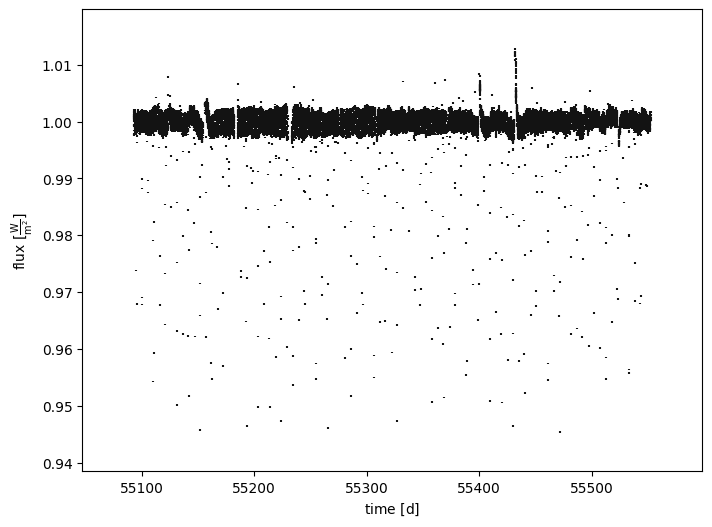

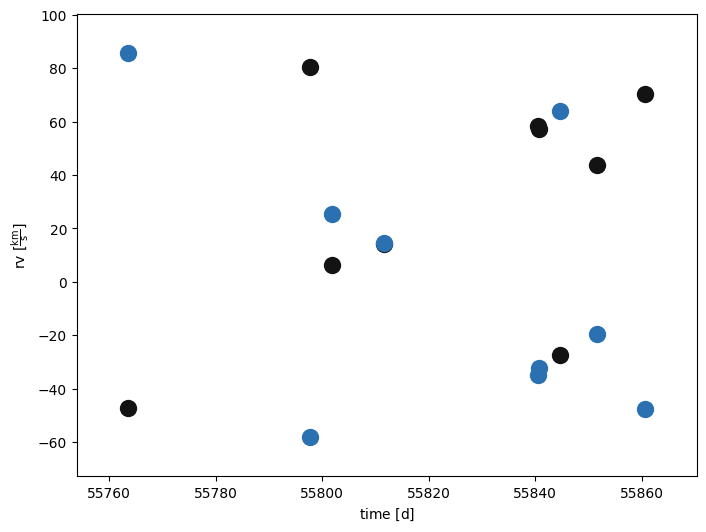

In [31]:
_ = b.plot(dataset = 'lc01', show = True, marker = '+')
_ = b.plot(dataset = 'rv01', show = True, marker = 'o')

/home/karanbt/miniconda3/envs/astro/lib/python3.11/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


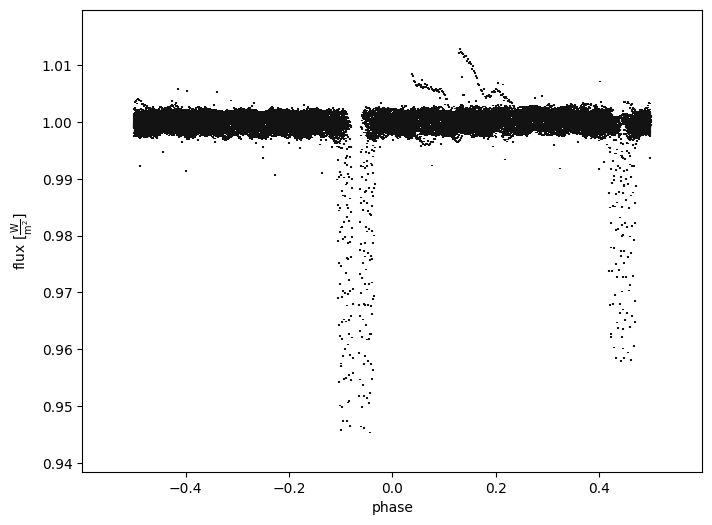

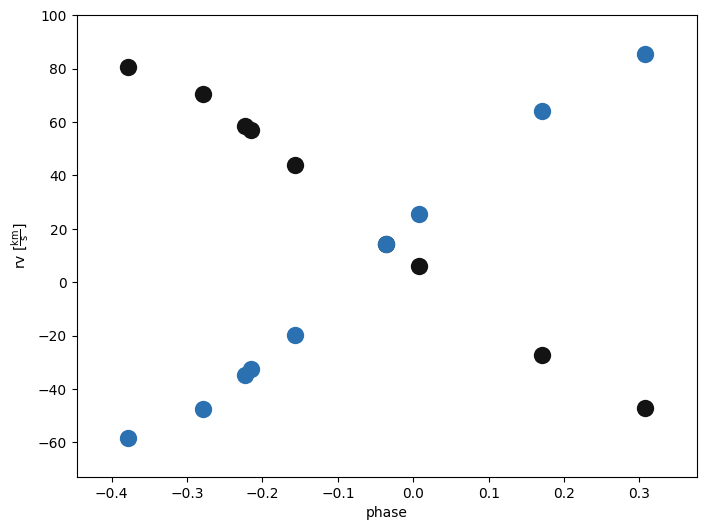

In [32]:
_ = b.plot(dataset = 'lc01', x = 'phases', show = True, marker = '+')
_ = b.plot(dataset = 'rv01', x = 'phases', show = True, marker = 'o')